In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### EDA

In [6]:
df.shape

(10000, 14)

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype='object')

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.drop(['RowNumber','CustomerId','Surname'],axis = 1, inplace = True)

In [10]:
df.shape

(10000, 11)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
categorical_cols = df.columns[df.dtypes=='object']
numerical_cols = df.columns[df.dtypes!='object']
print('categorical_cols: ',categorical_cols)
print('------------------------------------------------------------------------------------------------------------')
print('numerical_cols: ',numerical_cols)

categorical_cols:  Index(['Geography', 'Gender'], dtype='object')
------------------------------------------------------------------------------------------------------------
numerical_cols:  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype='object')


In [13]:
len(categorical_cols)

2

In [14]:
len(numerical_cols)

9

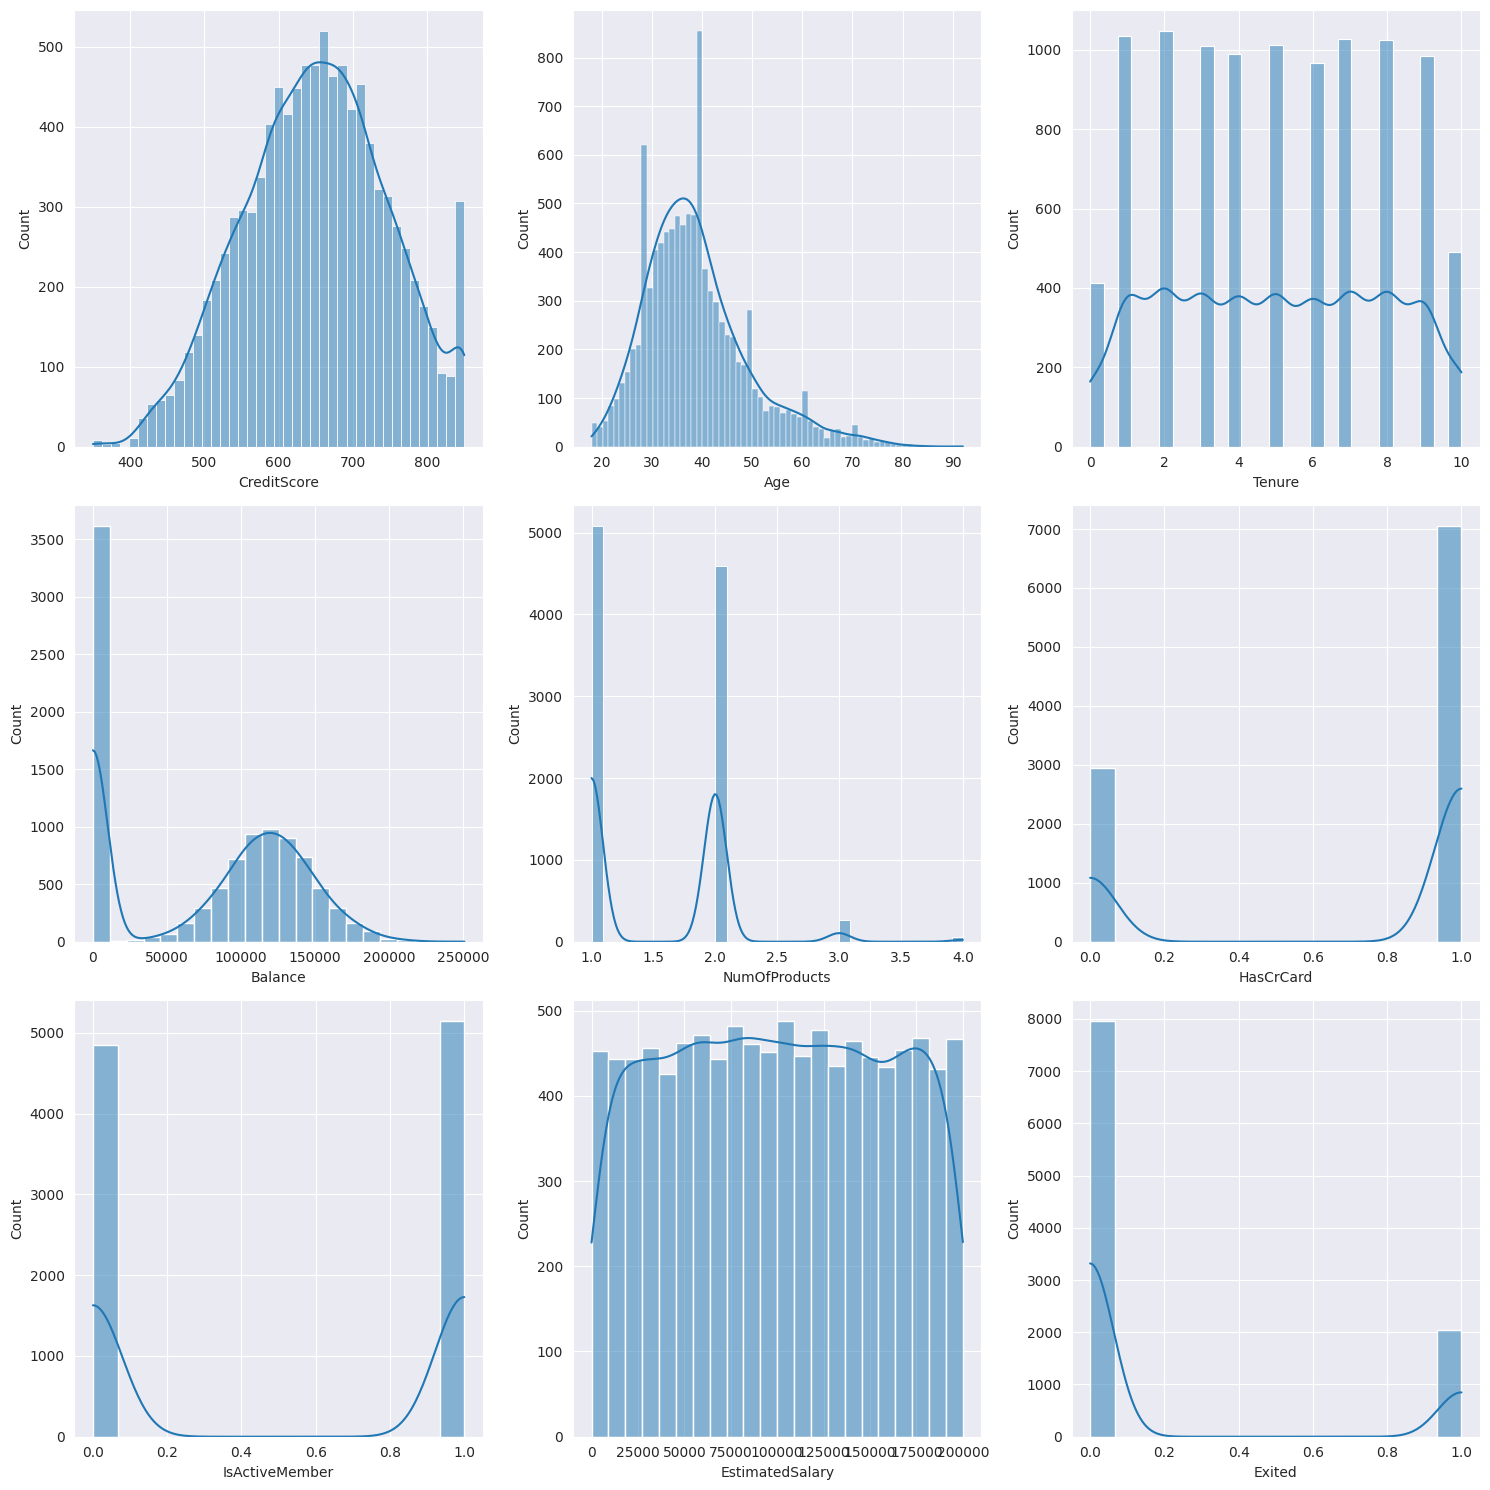

In [15]:
#Plots for all numerical columns
cols = 3
rows = 3
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = df[col], ax = ax, kde = True)
    
fig.tight_layout()  
plt.show()

In [16]:
df.duplicated().sum()

0

In [17]:
df[categorical_cols].describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [18]:
df[numerical_cols].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [19]:
temp = df.groupby('Exited').agg(Total_Exited=('Age','sum')).reset_index()
temp

,Exited,Total_Exited
0,0,297883
1,1,91335


In [20]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':2})
df['Geography'] = df['Geography'].map({'France':1,'Germany':2, 'Spain':3})

In [21]:
df['Geography'].value_counts()

Geography
1    5014
2    2509
3    2477
Name: count, dtype: int64

In [22]:
df['Gender'].value_counts()

Gender
1    5457
2    4543
Name: count, dtype: int64

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,608,3,2,41,1,83807.86,1,0,1,112542.58,0
2,502,1,2,42,8,159660.80,3,1,0,113931.57,1
3,699,1,2,39,1,0.00,2,0,0,93826.63,0
4,850,3,2,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

,Geography,Exited,%Exited
0,1,810,39.76
1,2,814,39.96
2,3,413,20.27


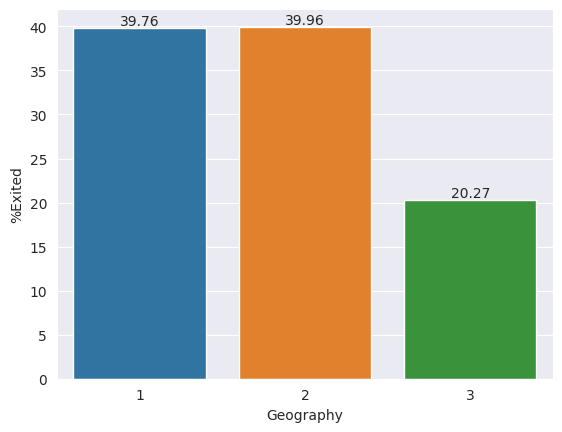

,Gender,Exited,%Exited
0,1,898,44.08
1,2,1139,55.92


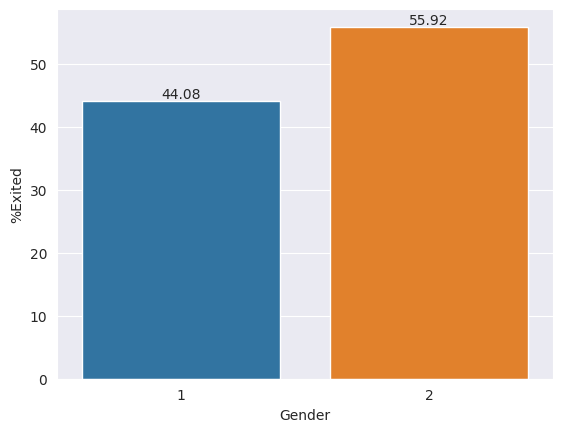

In [25]:
bar_col = ['Geography', 'Gender']

for i in bar_col:
    temp = df.groupby(i).agg(Exited=('Exited','sum')).reset_index()
    temp['%Exited'] = round((temp['Exited']/temp['Exited'].sum())*100,2)
    #temp = temp.sort_values(by = '%Attrition', ascending = False)
    display(temp)
    
    data = temp
    x= i
    y = temp['%Exited']
    ax = sns.barplot(data = data, x= x, y=y)
    ax.bar_label(ax.containers[0])
    plt.show();

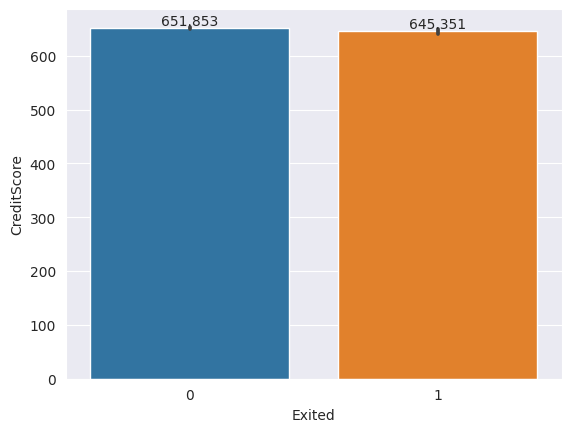

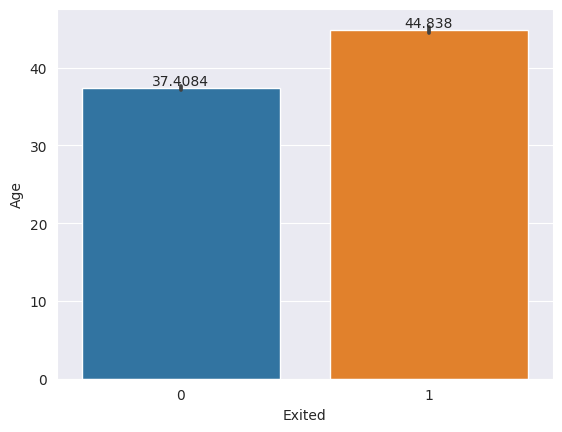

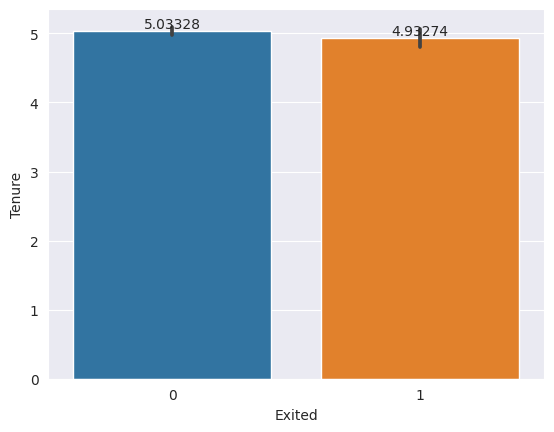

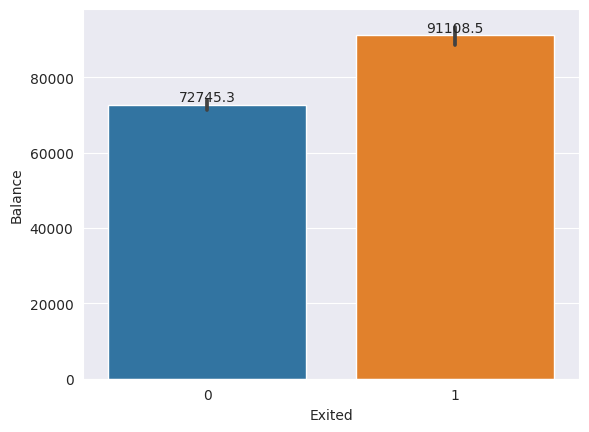

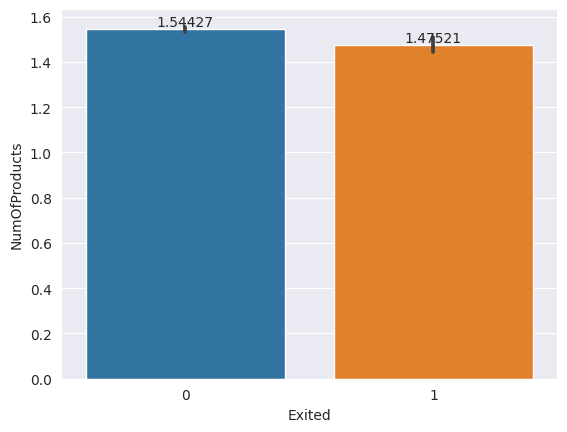

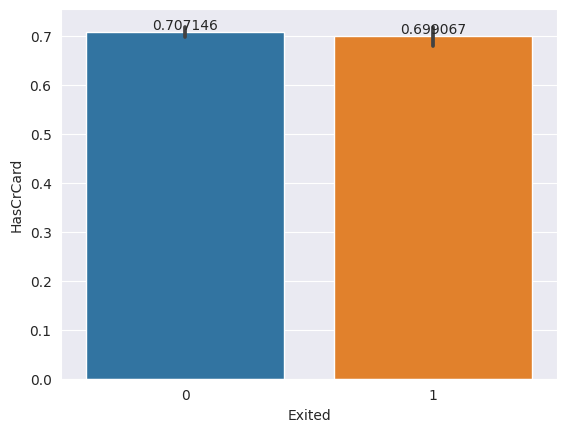

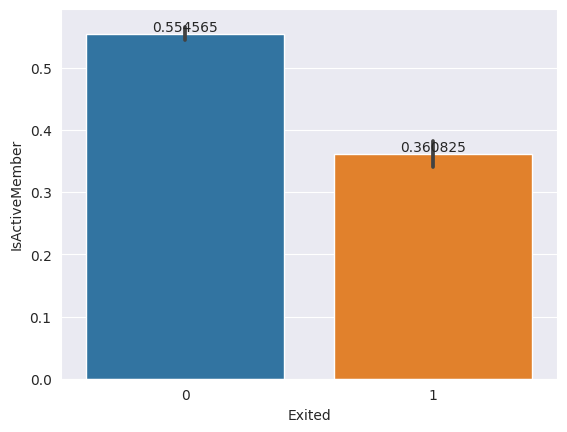

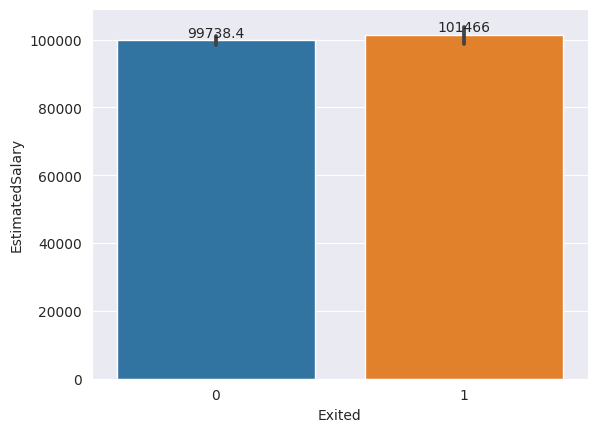

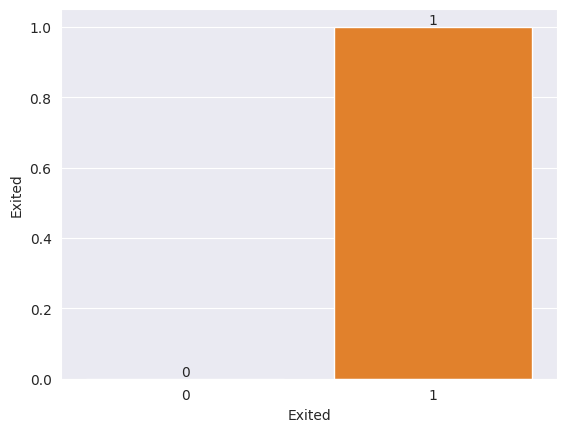

In [26]:
for i in numerical_cols:    
    data = df
    x= df['Exited']
    y = i
    ax = sns.barplot(data = data, x= x, y=y)
    ax.bar_label(ax.containers[0])
    plt.show();

In [27]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype='object')

<Axes: >

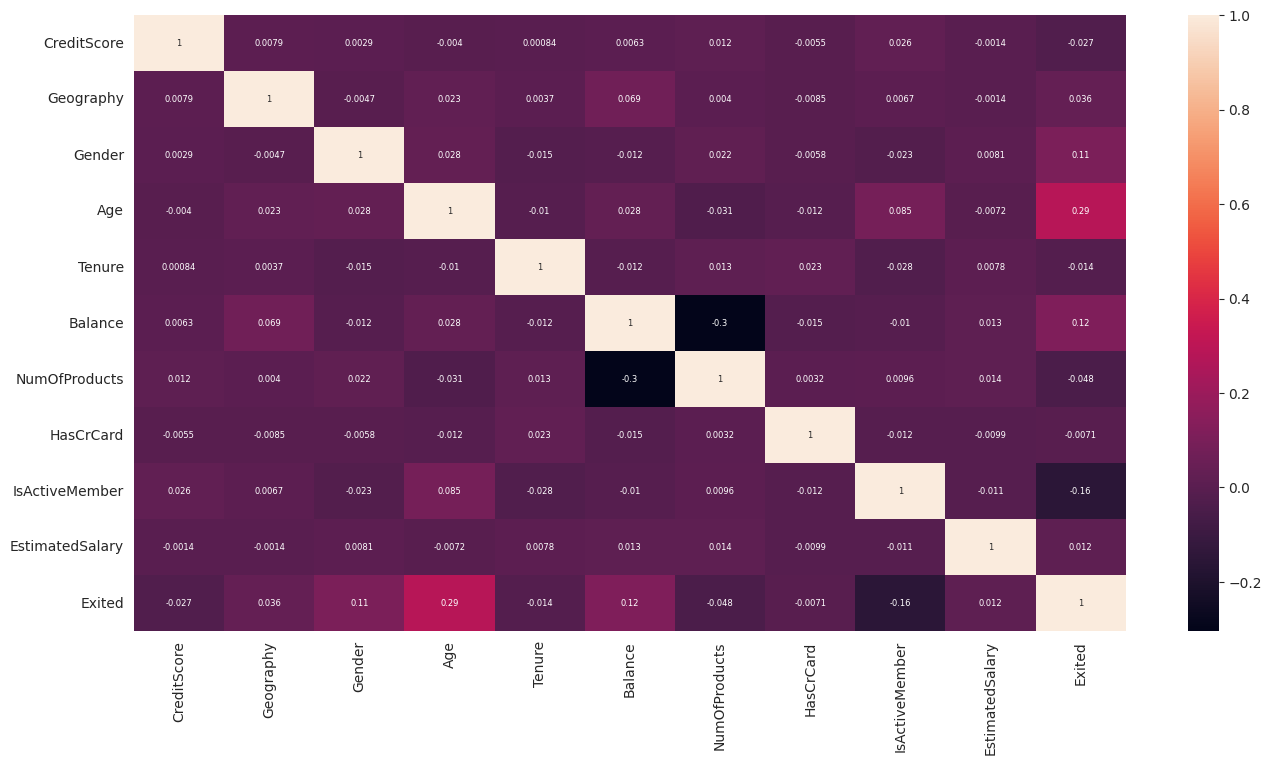

In [28]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot = True, annot_kws={'size': 6})

In [29]:
corr = df.corr()
corr_matrix = corr.unstack()
corr_matrix = corr_matrix[(abs(corr_matrix) >= 0.8) & (corr_matrix != 1)]
corr_matrix

Series([], dtype: float64)

In [30]:
##Train Test Split
X = df.drop('Exited', axis = 1)
y = df[['Exited']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6700, 10), (3300, 10), (6700, 1), (3300, 1))

### Scaling Numeric Features

In [32]:
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
X_train = pd.DataFrame(scaler.fit_transform(X_train[numerical_cols]), columns = scaler.get_feature_names_out())
X_test = pd.DataFrame(scaler.transform(X_test[numerical_cols]), columns = scaler.get_feature_names_out())

In [35]:
X_train.shape, X_test.shape

((6700, 10), (3300, 10))

In [36]:
X_train.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,6.700000e+03,6.700000e+03,6.700000e+03,6.700000e+03,6.700000e+03,6.700000e+03,6.700000e+03,6.700000e+03,6.700000e+03,6.700000e+03
mean,-1.633188e-16,1.368060e-16,1.908921e-16,-1.569557e-16,-1.171865e-16,-1.484716e-16,3.181535e-17,-7.635683e-17,3.711790e-18,6.150967e-17
std,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00
min,-3.138896e+00,-9.019251e-01,-9.089063e-01,-1.989540e+00,-1.719880e+00,-1.216488e+00,-9.047184e-01,-1.546185e+00,-1.035557e+00,-1.748125e+00
25%,-6.951069e-01,-9.019251e-01,-9.089063e-01,-6.561004e-01,-1.028191e+00,-1.216488e+00,-9.047184e-01,-1.546185e+00,-1.035557e+00,-8.543820e-01
50%,1.632814e-03,-9.019251e-01,-9.089063e-01,-1.798721e-01,9.342965e-03,3.237880e-01,-9.047184e-01,6.467531e-01,9.656638e-01,-1.031659e-03
75%,6.983726e-01,1.504166e+00,1.100223e+00,4.868475e-01,7.010320e-01,8.255347e-01,8.197804e-01,6.467531e-01,9.656638e-01,8.618755e-01
max,2.060655e+00,1.504166e+00,1.100223e+00,5.058639e+00,1.738566e+00,2.793519e+00,4.268778e+00,6.467531e-01,9.656638e-01,1.712598e+00


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Define the model
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(64, input_dim=10, activation='relu'))  # Assuming 8 input features
model.add(BatchNormalization())

# Add dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add another hidden layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

# Add another dropout layer to prevent overfitting
model.add(Dropout(0.3))

# Add output layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

2024-03-30 17:46:00.841638: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-30 17:46:00.841795: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-30 17:46:00.996446: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 192 (768.00 B)

1. Importing TensorFlow and Keras Modules:
Here, we import TensorFlow and specific modules from Keras required to define and build the neural network model.

2. Defining the Model:
We initialize a sequential model object. The sequential model is a linear stack of layers.

3. Adding Layers:

* We add layers to the model using the .add() method.
* The Dense layer represents a fully connected layer with a specified number of neurons.
* The first Dense layer has 64 neurons and expects input data with 10 features (input_dim=10). The activation function used is ReLU.
* Dropout layers (Dropout(0.5) and Dropout(0.3)) are added after the first and second hidden layers, respectively, to prevent overfitting. Dropout randomly sets a fraction of input units to 0 at each update during training.
* The final Dense layer has 1 neuron and uses the sigmoid activation function, suitable for binary classification tasks.

4. Batch Normalization:

* We add BatchNormalization layers after each dense layer to normalize the activations of the previous layer.
* Batch normalization helps stabilize and accelerate the training of deep neural networks by normalizing the input of each layer. It reduces the internal covariate shift and helps in training deeper networks more effectively.

5. Compiling the Model:

* We compile the model using the compile() method, specifying the optimizer, loss function, and metrics to monitor during training.
* Here, we use the Adam optimizer, binary cross-entropy loss function (suitable for binary classification), and accuracy as the evaluation metric.


5. Model Summary:
* We print a summary of the model architecture, including the number of parameters in each layer.
* This provides insights into the structure of the model, the number of trainable parameters, and the flow of data through the network.

In [38]:
##Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [39]:
# Fitting the ANN to the Training set
model_history=model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 50, callbacks =early_stopping )


Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6021 - loss: 0.7427 - val_accuracy: 0.8124 - val_loss: 0.4284
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7660 - loss: 0.5154 - val_accuracy: 0.8178 - val_loss: 0.4191
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7856 - loss: 0.4783 - val_accuracy: 0.8314 - val_loss: 0.4076
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8016 - loss: 0.4483 - val_accuracy: 0.8386 - val_loss: 0.4009
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7997 - loss: 0.4522 - val_accuracy: 0.8409 - val_loss: 0.3935
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8128 - loss: 0.4276 - val_accuracy: 0.8454 - val_loss: 0.3907
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8087 - loss: 0.4339 - val_accuracy: 0.8440 - val_loss: 0.3881
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8254 - loss: 0.4101 - val_accuracy: 0.

In [40]:
# Predictions on the test set
predictions = model.predict(X_test)
predictions

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.05527987],
       [0.04984703],
       [0.11352888],
       ...,
       [0.11651756],
       [0.28113818],
       [0.6592499 ]], dtype=float32)

In [41]:
# Get the weights of the trained model
model_weights = model.get_weights()
model_weights

[array([[ 0.01256124, -0.04614685, -0.09308075, -0.03012486,  0.10786363,
          0.15668367, -0.02469182, -0.27071762, -0.05076316,  0.04093729,
         -0.05353741,  0.06533134, -0.09580312, -0.01404639,  0.14726703,
          0.11835901, -0.02292182,  0.14206766,  0.22963285, -0.04901253,
         -0.167169  ,  0.0805508 ,  0.11611153,  0.0928658 ,  0.22822165,
         -0.04130819,  0.18062611, -0.11570615, -0.05482208,  0.03456901,
          0.10077213,  0.23602639,  0.20040752,  0.19661564, -0.3456354 ,
         -0.0010295 , -0.27112475, -0.01352962,  0.0543141 ,  0.08890466,
          0.0411979 , -0.109998  ,  0.09417087,  0.05310834, -0.07158545,
         -0.01751455,  0.10394071,  0.05975068,  0.07531444, -0.22364765,
          0.14692807,  0.27922037,  0.215625  , -0.05652634, -0.00859276,
          0.01047908, -0.05852048, -0.04839498,  0.03203001,  0.04137307,
          0.02425805, -0.10913026, -0.04201896, -0.03562616],
        [ 0.02887377,  0.00403664,  0.18246178,  0

#### Visualizing Training History (Loss and Accuracy):

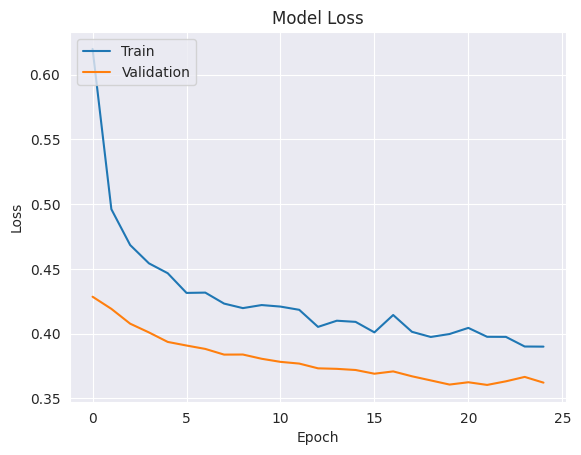

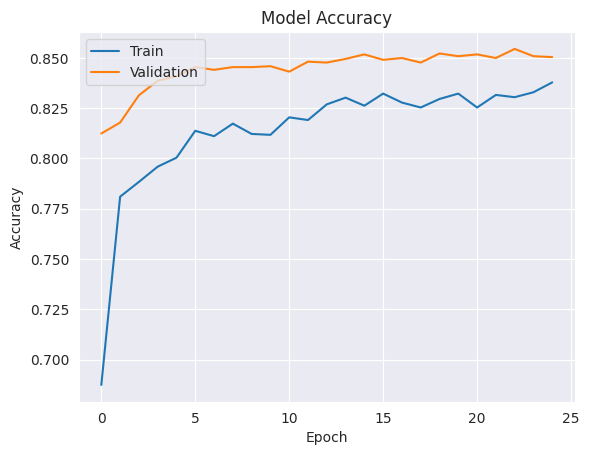

In [42]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Visualizing the training history, specifically the loss and accuracy, is essential for understanding how well your model is learning from the training data and whether it's overfitting or underfitting. Let's break down the code and discuss what kind of graphs to expect and how to interpret them:

1. Loss Graph:
* 
* The first block of code plots the training and validation loss values over epochs.
* The x-axis represents the number of epochs, and the y-axis represents the loss value.
* The loss value is a measure of how well the model is performing. Lower loss values indicate better performance.
* Ideally, you want to see both the training and validation loss decreasing steadily over epochs. This indicates that the model is learning and generalizing well.
* If the training loss decreases but the validation loss starts increasing or remains stagnant, it might indicate overfitting, where the model is memorizing the training data and not generalizing well to unseen data.

2. Accuracy Graph:

* The second block of code plots the training and validation accuracy values over epochs.
* The x-axis represents the number of epochs, and the y-axis represents the accuracy.
* Accuracy is a measure of how often the model predicts the correct label. Higher accuracy values indicate better performance.
* Similar to the loss graph, you want to see both training and validation accuracy increasing steadily over epochs.
* If the training accuracy continues to increase while the validation accuracy plateaus or decreases, it might indicate overfitting.
* Conversely, if both training and validation accuracy are low and don't improve over epochs, it might indicate underfitting, where the model is too simple to capture the underlying patterns in the data.


In summary, while visualizing the training history, you should aim to see decreasing loss and increasing accuracy over epochs for both training and validation data. This indicates that your model is learning effectively and generalizing well to unseen data. If you notice any discrepancies between training and validation metrics, it's essential to investigate further to diagnose potential issues such as overfitting or underfitting.